# Example

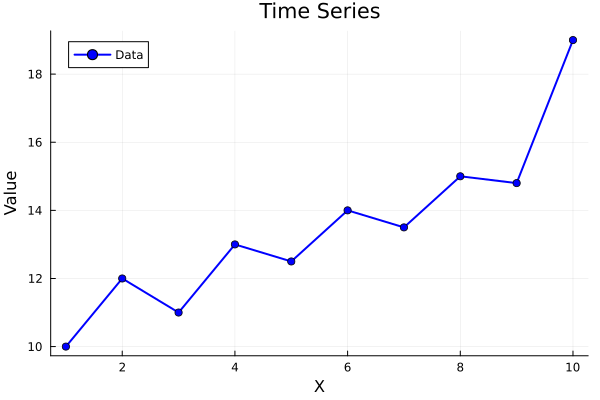

In [90]:
import Plots
using TimeSeriesKit

ts = TimeSeries([10.0, 12.0, 11.0, 13.0, 12.5, 14.0, 13.5, 15.0, 14.8, 19.0])
plot_timeseries(ts)

# Linear Regression

Is fitted? true
X Out of Sample: [6, 7, 8, 9, 10, 11, 12, 13]
Y Out of Sample: [13.500000000000002, 14.100000000000001, 14.700000000000003, 15.300000000000002, 15.900000000000002, 16.500000000000004, 17.1, 17.700000000000003]


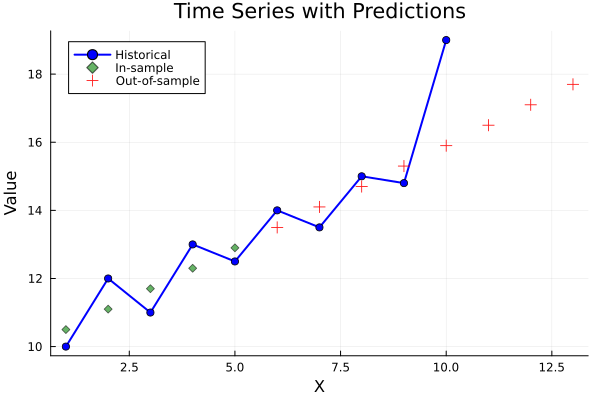

In [91]:
# Split data
train_ts = ts[1:5]
val_x = extrapolate_timestamps(train_ts, length(ts) - length(train_ts) + 3)

# Fit Linear Model
model_linear = LinearModel()
fit(model_linear, train_ts)
println("Is fitted? $(is_fitted(model_linear))")


# Predict ins-ample and out-of-sample
in_sample = predict(model_linear, train_ts.timestamps)
out_of_sample = predict(model_linear, val_x)
println("X Out of Sample: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, in_sample, out_of_sample)

## Iterative training  with sliding_window 3

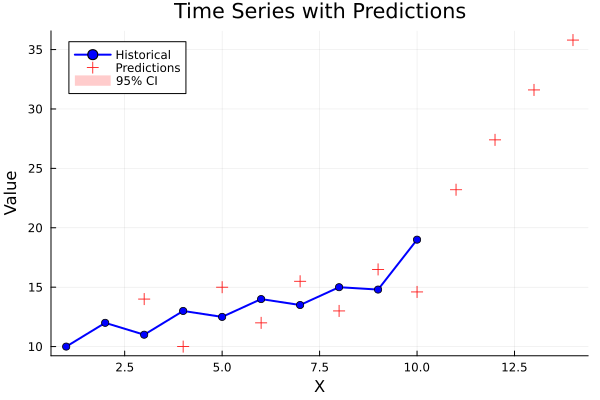

In [92]:

# Fit a linear model
model_linear = LinearModel(sliding_window=2)
fit(model_linear, ts)


# Or predict at specific x values
out_of_sample = iterative_predict(model_linear, ts, 4; return_uncertainty=true)

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, out_of_sample, confidence_level=0.95)

# Linear Regression with Prediction Uncertainty

Dict{Symbol, Any}(:intercept => 3.5814938023520466, :slope => 0.002980843235063638, :intercept_variance => 0.27283441498780886, :slope_variance => 0.00031780362840746524, :covariance => -0.008103992524390362, :residual_variance => 3.3091302807927314)

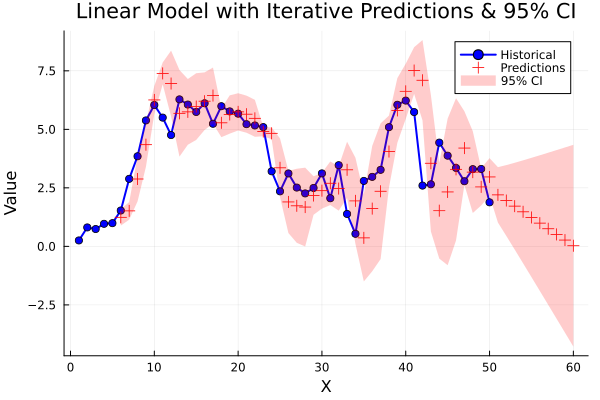

In [93]:
# Import packages (Distributions before TimeSeriesKit to avoid conflicts)
import Plots
import Distributions
using TimeSeriesKit
import Random

Random.seed!(1434)
ts = RandomWalk(50)
# set a seed for reproducibility

# Fit linear model
model = LinearModel(sliding_window=5)
fit(model, ts)
print(model.state.parameters)

predictions = iterative_predict(model, ts, 10, return_uncertainty=true)

plot_timeseries(ts, predictions, confidence_level=0.95, title="Linear Model with Iterative Predictions & 95% CI")

# Bayesian Autoregressive Model (with uncertainty estimation) 

RMSE: 1.0510975163336203


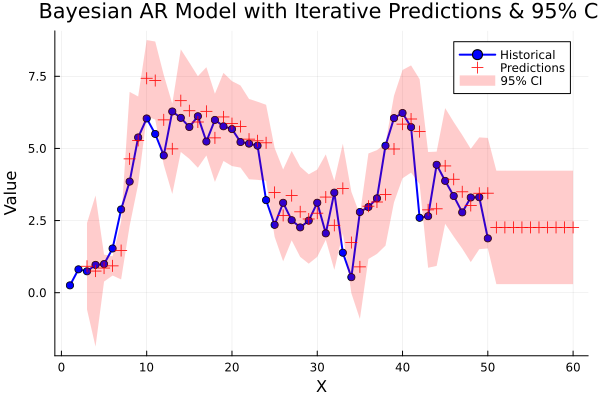

In [109]:
bar = BayesianARModel(p=1)
fit(bar, ts)

predictions_bayesian = iterative_predict(bar, ts, 10, return_uncertainty=true)
println("RMSE: $(rmse(ts, predictions_bayesian.predictions))")
plot_timeseries(ts, predictions_bayesian, confidence_level=0.95, title="Bayesian AR Model with Iterative Predictions & 95% CI")

# Simple Exponential Smoothing

Optimized alpha: 0.8


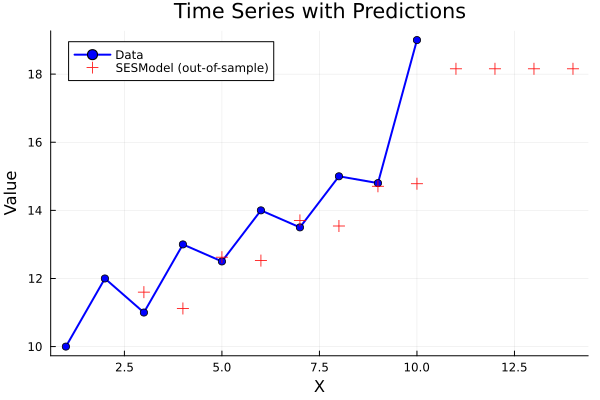

In [26]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ses = SESModel()
fit(model_ses, ts)

println("Optimized alpha: ", model_ses.alpha)

# Forecast
predicted_ses = iterative_predict(model_ses, ts, 4)

# Plot
plot_timeseries(ts, predicted_ses)

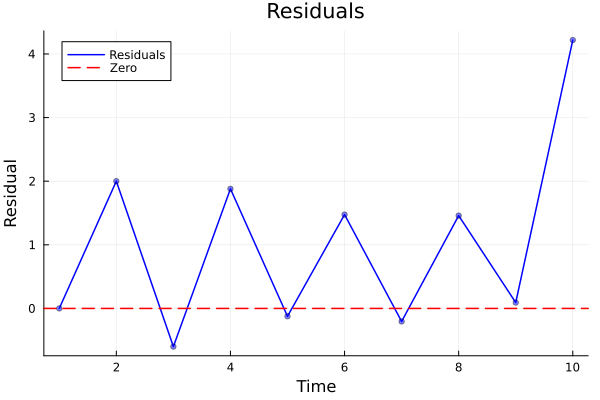

In [27]:
# Plot residuals
plot_residuals(model_ses)

# Auto Regression (AR(1))

# AR(2) On Random Walk

TimeSeries{Float64}([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [-1.0785999117461915, -0.24644693626772318, 0.12258050748451454, 0.11657511071091942, -0.7954411845102792, -0.5848632317323547, 0.2538722991774989, 0.32010651138278634, 0.3449183465226704, -0.8834061907547264, -0.05809118718820305, 0.2388142330534926, -0.2093108986272202, 1.3991608080308264, 2.6693674380080457, 2.0435079934884866, 2.6356821853963903, 1.091393545861779, 1.978640141979604, 2.705637369956214, 2.45867332651761, 2.234993664787846, 0.8288233091764097, 0.9441038957386034, 0.47338593039529564, -1.0985589286298376, -0.12099094931361598, 0.27278020175783557, 0.509584795467

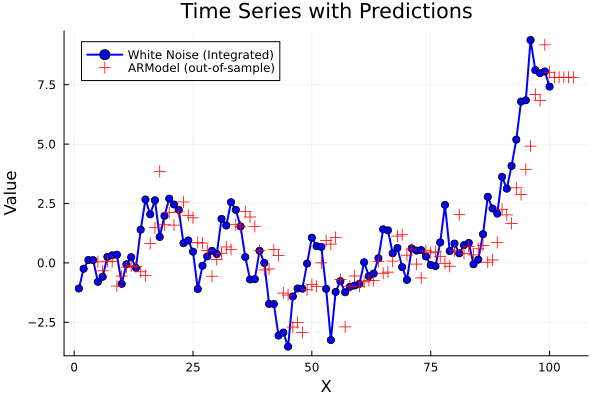

In [79]:
ar = ARModel(p=3)

white = integrate(WhiteNoise(100))

predictions = iterative_predict(ar, white, 5)
println(white)
println("RMSE: $(rmse(white, predictions))")
plot_timeseries(white, predictions)

# ARIMA Model Test

ARIMA(2,1,2) fitted successfully
Parameters: Dict{Symbol, Any}(:original_values => [0.3389655404812357, 1.837008212001698, 2.4197602636539086, 3.52695993062203, 4.445129325774689, 5.52629407370354, 7.655082709726664, 9.180361528435792, 9.365988225530344, 9.271683819532193, 7.873274808955094, 5.3884662502499765, 3.557575908531179, 3.47660227404139, 4.26303909828627, 3.2371865428651, 1.2236806805185618, -1.077333964150594, -2.120498210669636, -3.829608794560915, -6.235330502313463, -8.168747667271688, -9.409488929528695, -9.798796018347218, -11.543527025831644, -13.465224622748043, -13.310040305326293, -12.84654176275506, -11.36445460357977, -8.441327453271523, -4.99803377447631, -3.803341010499106, -2.76214557490587, -1.8533209079153252, -1.049436177641582, -2.105351833902047, -3.5046563008309173, -4.499833836228861, -4.281165080499617, -5.453642283610442, -7.61387118099217, -9.100238528301965, -10.731903311698392, -11.66434453876224, -14.428066492354297, -16.778911644502884, -17.436218

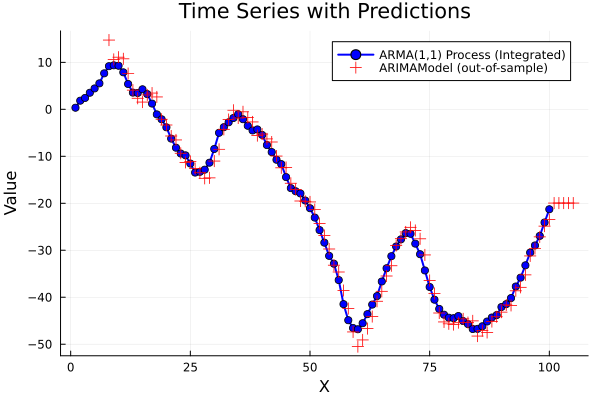

In [77]:
arma_ts = ARMAProcess(100; phi=[0.7], theta=[0.5])
arima_ts = integrate(arma_ts)
plot_ts(arima_ts)

# Create ARIMA(1,1,1) model - will difference once, then fit AR(1) and MA(1)
p, d, q = 2, 1, 2
arima = ARIMAModel(p=p, d=d,  q=q)

# Fit and predict
fit(arima, arima_ts)
predictions = forecast(arima, arima_ts, 10)

println("ARIMA($p,$d,$q) fitted successfully")
println("Parameters: $(get_parameters(arima))")
println("Forecast values: $(predictions.values)")

predictions = iterative_predict(arima, arima_ts, 5)
plot_timeseries(arima_ts, predictions)